<a href="https://colab.research.google.com/github/ik-okoro/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/Ik's-Unit_2_1_1_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

# Wrangle Data

## 1.1 Import Data

In [9]:
import pandas as pd

dtype_dict = {"ZIP_CODE" : "object"}

df = pd.read_csv(DATA_PATH + "condos/tribeca.csv", parse_dates=["SALE_DATE"], index_col=["SALE_DATE"], na_values=0, dtype=dtype_dict)

## 1.2 EDA

In [3]:
df.shape

(90, 9)

In [10]:
df.head()

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,,,,,
2019-01-03,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"181 HUDSON STREET, 6D",6D,10013.0,1840.0,1909.0,2800000
2019-01-07,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"10 LITTLE WEST STREET, 19A",19A,10004.0,1759.0,NaN,2650000
2019-01-09,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"30 LITTLE WEST STREET, 7G",7G,10004.0,1190.0,2005.0,1005000
2019-01-10,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"2 RIVER TERRACE, 4C",4C,NaN,1088.0,2006.0,1678000
2019-01-11,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"380 RECTOR PLACE, 10A",10A,10280.0,873.0,NaN,1380000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2019-01-03 to 2019-04-30
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NEIGHBORHOOD             90 non-null     object 
 1   BUILDING_CLASS_CATEGORY  90 non-null     object 
 2   ADDRESS                  90 non-null     object 
 3   APARTMENT_NUMBER         90 non-null     object 
 4   ZIP_CODE                 86 non-null     object 
 5   GROSS_SQUARE_FEET        90 non-null     float64
 6   YEAR_BUILT               72 non-null     float64
 7   SALE_PRICE               90 non-null     int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 6.3+ KB


**Our focus** is the relationship between size and price

In [12]:
import matplotlib.pyplot as plt


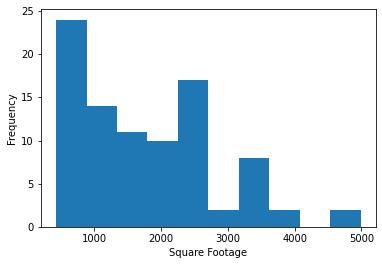

In [13]:
df["GROSS_SQUARE_FEET"].plot(kind="hist")
plt.xlabel("Square Footage")
plt.show()

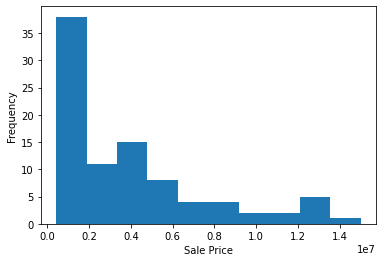

In [14]:
df["SALE_PRICE"].plot(kind="hist")
plt.xlabel("Sale Price")
plt.show()

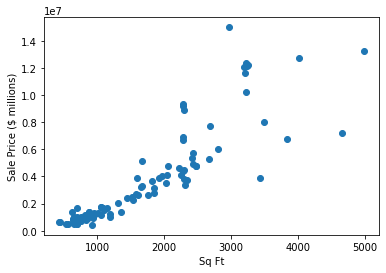

In [15]:
plt.scatter(df.GROSS_SQUARE_FEET, df.SALE_PRICE)
plt.xlabel("Sq Ft")
plt.ylabel("Sale Price ($ millions)")
plt.show()

# Interlude: What is a predictive model?

It is a way to create a mathematical equation that describes the relationship between two variables, in this case *square footage* and *price*

In [18]:
df[["GROSS_SQUARE_FEET", "SALE_PRICE"]].head(1)

,GROSS_SQUARE_FEET,SALE_PRICE
SALE_DATE,,
2019-01-03,1840.0,2800000


In [19]:
def price_predictor(sqft):
  # What's the equation that takes sqft and returns price?
  sale_price = sqft * 1521
  return sale_price

In [20]:
df["EST_PRICE"] = df["GROSS_SQUARE_FEET"].apply(price_predictor)

In [21]:
df[["GROSS_SQUARE_FEET", "SALE_PRICE", "EST_PRICE"]].head()

,GROSS_SQUARE_FEET,SALE_PRICE,EST_PRICE
SALE_DATE,,,
2019-01-03,1840.0,2800000,2798640.0
2019-01-07,1759.0,2650000,2675439.0
2019-01-09,1190.0,1005000,1809990.0
2019-01-10,1088.0,1678000,1654848.0
2019-01-11,873.0,1380000,1327833.0


In [29]:
df["ERROR"] = abs(df["SALE_PRICE"] - df["EST_PRICE"])

In [30]:
df[["GROSS_SQUARE_FEET", "SALE_PRICE", "EST_PRICE", "ERROR"]].head()

,GROSS_SQUARE_FEET,SALE_PRICE,EST_PRICE,ERROR
SALE_DATE,,,,
2019-01-03,1840.0,2800000,2798640.0,1360.0
2019-01-07,1759.0,2650000,2675439.0,25439.0
2019-01-09,1190.0,1005000,1809990.0,804990.0
2019-01-10,1088.0,1678000,1654848.0,23152.0
2019-01-11,873.0,1380000,1327833.0,52167.0


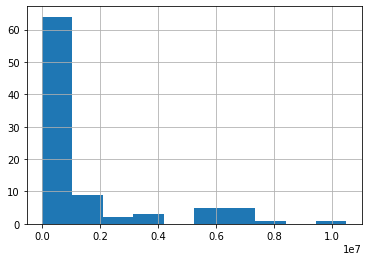

In [31]:
df["ERROR"].hist();

**MEAN ABSOLUTE ERROR**

In [32]:
df["ERROR"].mean()

1502401.6333333333

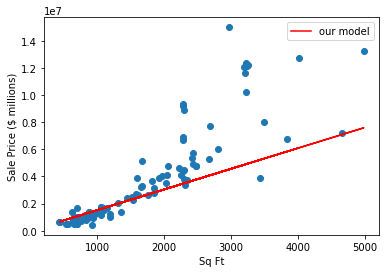

In [25]:
plt.scatter(df.GROSS_SQUARE_FEET, df.SALE_PRICE)
plt.plot(df["GROSS_SQUARE_FEET"], df["EST_PRICE"], color = "r", label = "our model")
plt.legend()
plt.xlabel("Sq Ft")
plt.ylabel("Sale Price ($ millions)")
plt.show()

# Split Data

Split our **target vector** from our **feature matrix**

In [34]:
target = "SALE_PRICE"

y = df[target]

X = df[["GROSS_SQUARE_FEET"]]

In [35]:
# Your "y" should be one-dimensional
y.shape

(90,)

In [37]:
# Your "X" should be two-dimensional
print(X.shape)
X.head()

(90, 1)


,GROSS_SQUARE_FEET
SALE_DATE,
2019-01-03,1840.0
2019-01-07,1759.0
2019-01-09,1190.0
2019-01-10,1088.0
2019-01-11,873.0


# Establish a Baseline

Since this is a regression problem, we need to calculate what the **mean absolute error** would be if we only predicted the mean 'SALE_PRICE'

In [38]:
y.mean() 

3928736.3666666667

In [ ]:
[y.mean()]*len(y)

In [39]:
from sklearn.metrics import mean_absolute_error

In [40]:
print("BASELINE MAE:", mean_absolute_error(y, [y.mean()]*len(y)))

BASELINE MAE: 2783380.1977777784


# Build Model

In [41]:
# Step 1: Import predictor
from sklearn.linear_model import LinearRegression

In [42]:
# Step 2: Instantiate your predictor
model = LinearRegression()

In [43]:
# Step 3: Train your model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# Step 4: Predict
y_pred = model.predict(X)

# Check Metrics

In [46]:
print("TRAINING MAE: ", mean_absolute_error(y, y_pred))

TRAINING MAE:  1176817.9930150746


# Interpreting Model

In [47]:
model.coef_

array([3076.44765542])

In [48]:
model.intercept_

-1505364.0408585514

sale_price = -1505364 + 3076*sq_ft

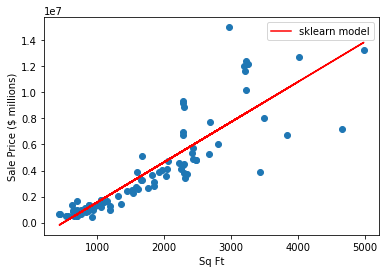

In [51]:
plt.scatter(X, y)
plt.plot(X, y_pred, color = "r", label = "sklearn model")
plt.legend()
plt.xlabel("Sq Ft")
plt.ylabel("Sale Price ($ millions)")
plt.show()